# NetworkX 

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks


In [1]:
%pylab inline
import networkx as nx


Populating the interactive namespace from numpy and matplotlib


#### test if networkx is working

In [2]:
import networkx as nx
print (nx)
print (nx.__version__)

<module 'networkx' from 'C:\\Users\\Kevin\\Anaconda3\\lib\\site-packages\\networkx\\__init__.py'>
2.3


## basic operations

In [3]:
G = nx.Graph()     # build undirected graph
G.add_node(1)      # add a node named "1"(1 is the label)
G.add_edge(2,3)    # add an edge from node2 to node3 
                   #  if node2 and node3 do not exist, it will auto add node2 and node3
G.add_edge(3,2)    # add an edge from node3 to node2

print ('Nodes:', G.nodes)
print ('Edges:', G.edges)

G.add_edge(1,3)
G.add_edge(2,4)
G.add_edge(3,4)

print ("=================")
print ('Nodes:', G.nodes)
print ('Edges:', G.edges)

Nodes: [1, 2, 3]
Edges: [(2, 3)]
Nodes: [1, 2, 3, 4]
Edges: [(1, 3), (2, 3), (2, 4), (3, 4)]


Graph(): Undirected Graph<br>
DiGraph(): Directed Graph<br>
MultiGraph(): Multiedges Undirected Graph<br>
MultiDiGraph(): Multiedges Directed Graph<br>

In [4]:
print (G.nodes())
print (G.edges())
print (G.number_of_edges())
print (G.number_of_nodes())
print (list(G.adj[2]))
print (G.degree(2))

[1, 2, 3, 4]
[(1, 3), (2, 3), (2, 4), (3, 4)]
4
4
[3, 4]
2


## use draw() function in networkx to plot the graph figure

node_size   :  the size of all nodes<br>
node_color  :  the color of all nodes<br>
node_shape  :  the shape of all nodes<br>
alpha       :  transparency<br>
width       :  width of edge<br>
edge_color  :  color of edge<br>
style       :  style of edge<br>
with_labels :  node with label<br>
font_size   :  size of label<br>
font_color  :  color of label<br>

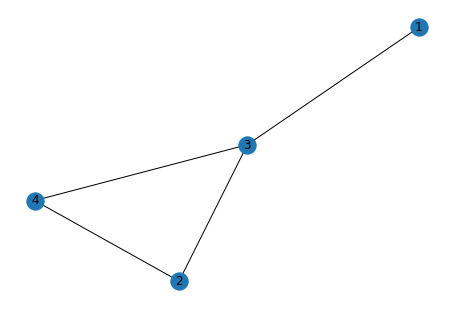

In [5]:
#disable the warnings
import warnings
warnings.filterwarnings("ignore")

nx.draw(G,with_labels=True)

### Layout

circular_layout： Position nodes on a circle<br>
random_layout  ： Position nodes uniformly at random in the unit square<br>
shell_layout   ： Position nodes in concentric circles<br>
spring_layout  ： Position nodes using Fruchterman-Reingold force-directed algorithm<br>
spectral_layout： Position nodes using the eigenvectors of the graph Laplacian<br>

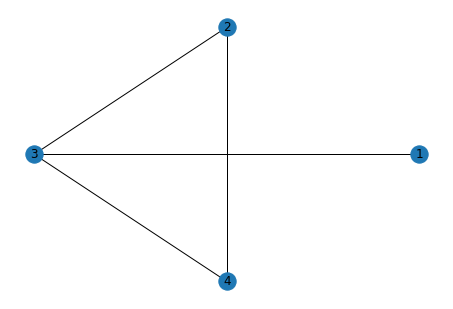

In [6]:
#setting
pos_cir = nx.circular_layout(G)
#draw
nx.draw(G,pos_cir,with_labels=True)

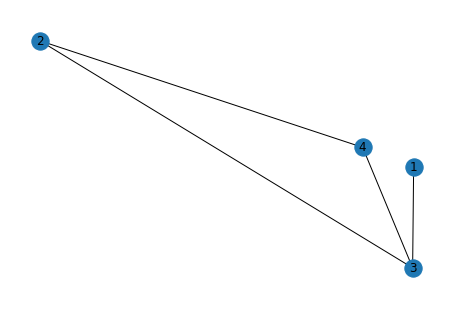

In [7]:
#setting
pos_cir = nx.random_layout(G)
#draw
nx.draw(G,pos_cir,with_labels=True)

### Another way to add nodes and edges

In [8]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(4,5), (4,2)])

In [9]:
print (G.nodes())
print (G.edges())

[1, 2, 3, 4, 5]
[(2, 4), (4, 5)]


### Path_Graph

In [10]:
H = nx.path_graph(10)

print (H.nodes)
print (H.edges)
print (H[0], H[1], H[2])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
{1: {}} {0: {}, 2: {}} {1: {}, 3: {}}


### Edge Weight

In [11]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edge(2,3)
print (G.edges)

[(2, 3)]


In [12]:
G.add_edge(1,2,weight=3.1415)
print (G[1], G[2])

{2: {'weight': 3.1415}} {3: {}, 1: {'weight': 3.1415}}


### Remove & Clear

In [13]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(2,4)
print (G.edges)


[(1, 3), (2, 3), (2, 4), (3, 4)]


In [14]:
G.remove_node(4)
print (G.edges)

[(1, 3), (2, 3)]


In [15]:
G.remove_edge(2,3)
print (G.nodes)
print (G.edges)

[1, 2, 3]
[(1, 3)]


In [16]:
G.clear()
print (G.nodes)
print (G.edges)

[]
[]


### Directed Graphs

In [17]:
G = nx.Graph()
G.add_node(1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,2)

DG = nx.DiGraph()
DG.add_node(1)
DG.add_edge(1,2)
DG.add_edge(2,3)
DG.add_edge(3,2)

print (G[1], G[2], G[3])
print (DG[1], DG[2], DG[3])

{2: {}} {1: {}, 3: {}} {2: {}}
{2: {}} {3: {}} {2: {}}


In [18]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5),(3,1,0.75),(1,4,0.4)])
print (DG[1], DG[2], DG[3], DG[4])

{2: {'weight': 0.5}, 4: {'weight': 0.4}} {} {1: {'weight': 0.75}} {}


In [19]:
print (DG.degree(1))   #outdegree:2 indegree:1
print (DG.out_degree(1))
print (DG.in_degree(1))
print (DG.out_degree(1,weight='weight'))  #the sum of the weight of node1's out degree
print (DG.degree(1,weight='weight'))      #the sum of the weight of node1'a out degree + in degree
print ([n for n in DG.neighbors(1)])
print (DG.neighbors(1))

3
2
1
0.9
1.65
[2, 4]


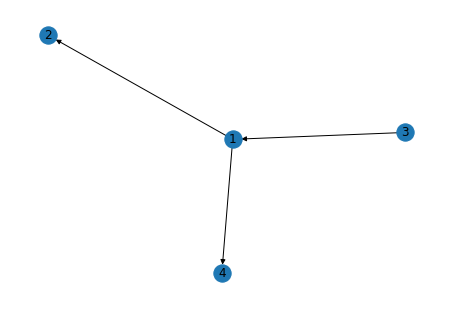

In [20]:
nx.draw(DG,with_labels=True)

### Accessing nodes

#### Use adjacency_iter() to visit all the node in graph<br> return (node,adjacencydict)

In [21]:
G = nx.Graph()
G.add_path([0,1,2,3])
print (G.edges)

[(0, 1), (1, 2), (2, 3)]


In [22]:
for n,nbrdict in G.adjacency():
    print (n,nbrdict)

0 {1: {}}
1 {0: {}, 2: {}}
2 {1: {}, 3: {}}
3 {2: {}}


### Save your graph

In [23]:
import pickle
G = nx.path_graph(10)
pickle.dump(G,open('networkx_example.txt','wb'))

In [24]:
G_load = pickle.load(open('networkx_example.txt', 'rb'))
print (G_load.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


## Example: DFS

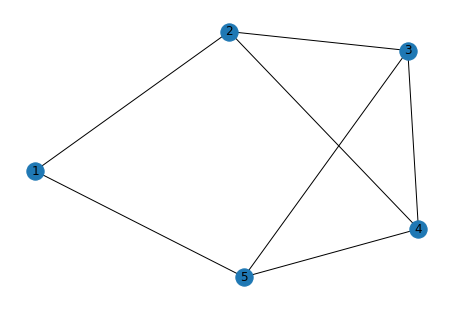

In [25]:
G = nx.Graph()  
G.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5), (5,3)])  
stack = [1]  # Start from node1  
visit_list = []  
nx.draw(G, with_labels=True)

In [26]:
while len(stack) > 0:  
    vnode = stack.pop()  
    if vnode not in visit_list:  
        print("\t[Info] Visit {0}...".format(vnode))  
        visit_list.append(vnode)  
    nbs = G.neighbors(vnode)  
    for nb in nbs:  
        if nb not in visit_list:  
            print("\t[Info] Put {0} in stack...".format(nb))  
            stack.append(nb)  
    print("\tStack list={0}".format(stack))  
    print("\tVisit list={0}".format(visit_list))  
    if len(visit_list) == len(G.nodes()): break  
  
print("\t[Info] Deep First Search has {0}".format(visit_list))  

	[Info] Visit 1...
	[Info] Put 5 in stack...
	[Info] Put 2 in stack...
	Stack list=[5, 2]
	Visit list=[1]
	[Info] Visit 2...
	[Info] Put 3 in stack...
	[Info] Put 4 in stack...
	Stack list=[5, 3, 4]
	Visit list=[1, 2]
	[Info] Visit 4...
	[Info] Put 3 in stack...
	[Info] Put 5 in stack...
	Stack list=[5, 3, 3, 5]
	Visit list=[1, 2, 4]
	[Info] Visit 5...
	[Info] Put 3 in stack...
	Stack list=[5, 3, 3, 3]
	Visit list=[1, 2, 4, 5]
	[Info] Visit 3...
	Stack list=[5, 3, 3]
	Visit list=[1, 2, 4, 5, 3]
	[Info] Deep First Search has [1, 2, 4, 5, 3]


## Social Network Measure

### Shorest Path

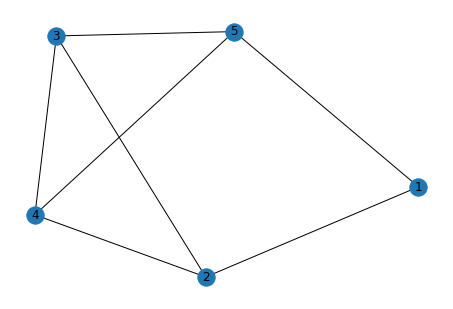

In [27]:
G = nx.Graph()
G.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5)])  
nx.draw(G,with_labels=True)


In [28]:
p = nx.shortest_path(G)
print (p[1][3])
print (p[2][4])
print (p[1][4])

[1, 5, 3]
[2, 4]
[1, 5, 4]


### Degree Centrality

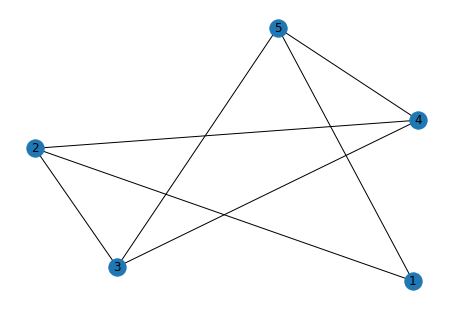

In [29]:
G = nx.Graph()
G.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5)])  
nx.draw(G,with_labels=True)

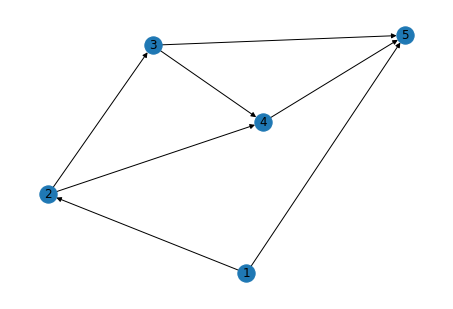

In [30]:
DG = nx.DiGraph()
DG.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5)])
nx.draw(DG,with_labels=True)

In [31]:
#degree centrality
d_c = nx.degree_centrality(G)
print (d_c)


{1: 0.5, 5: 0.75, 2: 0.75, 3: 0.75, 4: 0.75}


In [32]:
#in-degree centrality
in_dc = nx.in_degree_centrality(DG)
print (in_dc)
#out-degree centrality
out_dc = nx.out_degree_centrality(DG)
print (out_dc)

{1: 0.0, 5: 0.75, 2: 0.25, 3: 0.25, 4: 0.5}
{1: 0.5, 5: 0.0, 2: 0.5, 3: 0.5, 4: 0.25}


### Betweenness Centrality

In [33]:
b_c = nx.betweenness_centrality(G)
print (b_c)

{1: 0.05555555555555555, 5: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.05555555555555555, 4: 0.05555555555555555}


### Closeness_centrality

In [34]:
c_c = nx.closeness_centrality(G)
print (c_c)

{1: 0.6666666666666666, 5: 0.8, 2: 0.8, 3: 0.8, 4: 0.8}


### Eigenvector_centrality

In [35]:
e_c = nx.eigenvector_centrality(G)
print (e_c)

{1: 0.3192129106225465, 5: 0.4557987441346268, 2: 0.4557987441346268, 3: 0.49122201059321235, 4: 0.49122201059321235}


### Clique

[[1], [5], [2], [3], [4], [1, 5], [1, 2], [5, 3], [5, 4], [2, 3], [2, 4], [3, 4], [5, 3, 4], [2, 3, 4]]
1 clique: [[1], [5], [2], [3], [4]]
2 clique: [[1, 5], [1, 2], [5, 3], [5, 4], [2, 3], [2, 4], [3, 4]]
3 clique: [[5, 3, 4], [2, 3, 4]]


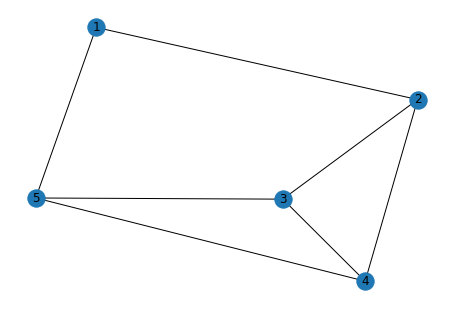

In [36]:
nx.draw(G,with_labels=True)
cliques = list(nx.enumerate_all_cliques(G))
print (cliques)
for i in range(1,len(max(cliques, key=len))+1):
    print (i,"clique:", [x for x in cliques if len(x)==i])


In [37]:
node_cliques = nx.cliques_containing_node(G,nodes=1)
print(node_cliques)

[[2, 1], [5, 1]]


### Triangle, Transitivity, Clustering Coefficient

In [38]:
print (nx.triangles(G))
print (nx.transitivity(G))
print (nx.clustering(G))

{1: 0, 5: 1, 2: 1, 3: 2, 4: 2}
0.46153846153846156
{1: 0, 5: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 0.6666666666666666}


## Comunity

https://github.com/taynaud/python-louvain

In [39]:
import community

G = nx.Graph()
G.add_edges_from([(1,5), (1,2), (2,4), (3,4), (3,5), (4,5)])  
partition = community.best_partition(G)
print (partition)

{1: 0, 5: 1, 2: 0, 4: 1, 3: 1}


{1: Text(0.802226,-0.31816,'1'),
 2: Text(0.663149,0.552371,'2'),
 3: Text(-1,-0.15982,'3'),
 4: Text(-0.296743,0.363748,'4'),
 5: Text(-0.168631,-0.438139,'5')}

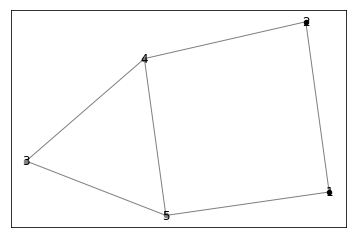

In [40]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
labels = {}    
for node in G.nodes():
    labels[node] = node
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(com / size))
nx.draw_networkx_edges(G,pos, alpha=0.5)
nx.draw_networkx_labels(G,pos,labels)

In [41]:
print (community.modularity(partition,G))

0.11111111111111113
